In [13]:
import numpy as np
import caffe
import matplotlib.pyplot as plt
# display plots in this notebook
%matplotlib inline

plt.rcParams['figure.figsize'] = (10, 10)        # large images
plt.rcParams['image.interpolation'] = 'nearest'  # don't interpolate: show square pixels
plt.rcParams['image.cmap'] = 'gray'  # use grayscale output rather than a (potentially misleading) color heatmap

In [14]:
caffe.set_mode_cpu()

model_def = 'deploy.prototxt'
model_weights = 'weights.caffemodel'

net = caffe.Net(model_def, model_weights, caffe.TEST)

In [15]:
def vis_square(data):
    """Take an array of shape (n, height, width) or (n, height, width, 3)
       and visualize each (height, width) thing in a grid of size approx. sqrt(n) by sqrt(n)"""
    
    # normalize data for display
    data = (data - data.min()) / (data.max() - data.min())
    # force the number of filters to be square
    n = int(np.ceil(np.sqrt(data.shape[0])))
    padding = (((0, n ** 2 - data.shape[0]),
               (0, 1), (0, 1))                 # add some space between filters
               + ((0, 0),) * (data.ndim - 3))  # don't pad the last dimension (if there is one)
    data = np.pad(data, padding, mode='constant', constant_values=1)  # pad with ones (white)
    # tile the filters into an image
    data = data.reshape((n, n) + data.shape[1:]).transpose((0, 2, 1, 3) + tuple(range(4, data.ndim + 1)))
    data = data.reshape((n * data.shape[1], n * data.shape[3]) + data.shape[4:])
    
    plt.imshow(data.squeeze()); plt.axis('off')

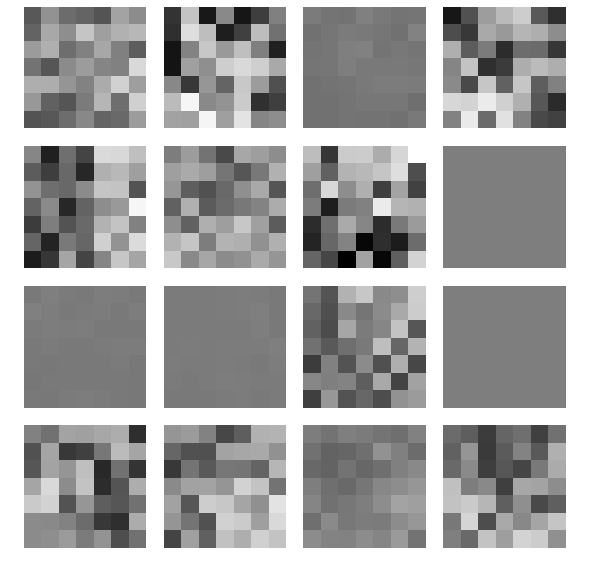

In [16]:
# the parameters are a list of [weights, biases]
filters = net.params['conv1'][0].data
vis_square(filters.transpose(0, 2, 3, 1))

In [17]:
# create transformer for the input called 'data'
transformer = caffe.io.Transformer({'data': net.blobs['data'].data.shape})

transformer.set_transpose('data', (2,0,1))  # move image channels to outermost dimension

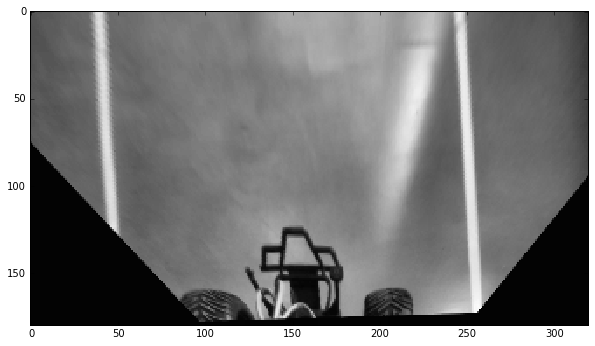

In [18]:
image = caffe.io.load_image('imgdata/camera01.png')
transformed_image = transformer.preprocess('data', image)
plt.imshow(image)

In [19]:
net.blobs['data'].data[...] = transformed_image[0,:,:]
output = net.forward()
pred = output['pred'][0]  # the output probability vector for the first image in the batch

print 'predicted value is:', pred

predicted value is: [-0.05588202]


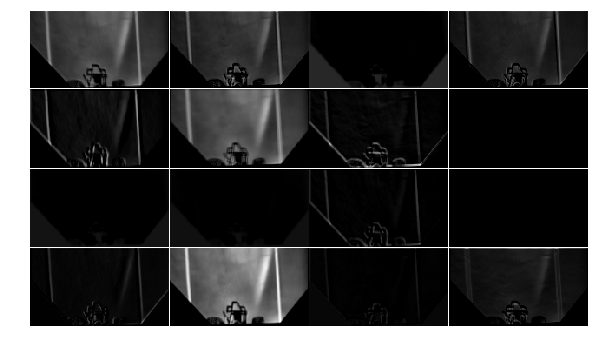

In [20]:
feat = net.blobs['conv1'].data[0, :]
vis_square(feat)

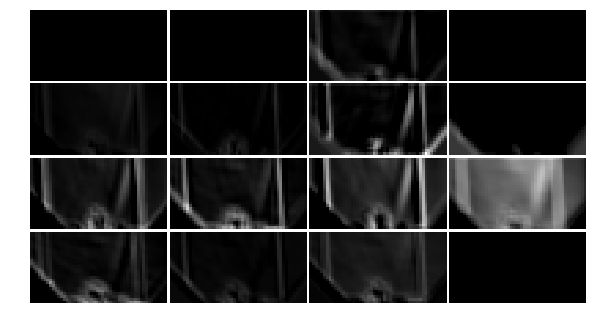

In [21]:
feat = net.blobs['conv2'].data[0, :]
vis_square(feat)

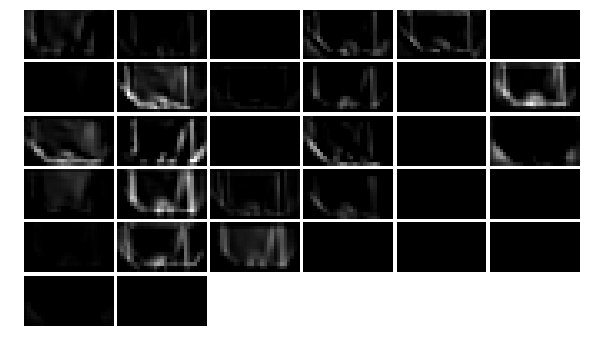

In [22]:
feat = net.blobs['conv3'].data[0, :]
vis_square(feat)

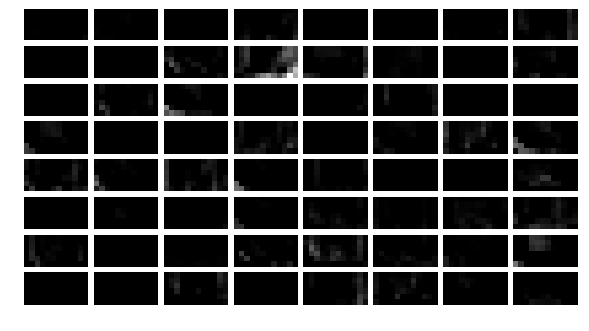

In [23]:
feat = net.blobs['conv4'].data[0, :]
vis_square(feat)

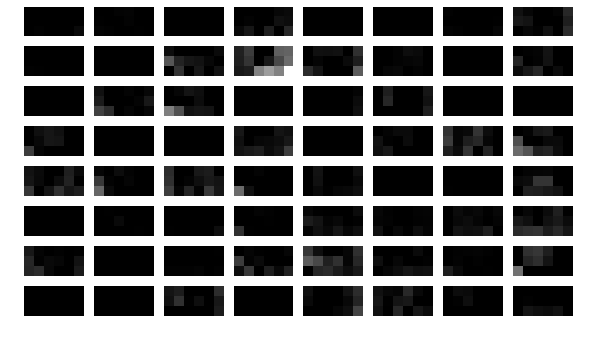

In [24]:
feat = net.blobs['pool4'].data[0]
vis_square(feat)